In [1]:
'''
About Dataset
Context
Understanding what will be the Burn Rate for the employee working in an organization based on the current pandemic situation where work from home is a boon and a bane. How are employees' Burn Rate affected based on various conditions provided?

Content
Globally, World Mental Health Day is celebrated on October 10 each year. The objective of this day is to raise awareness about mental health issues around the world and mobilize efforts in support of mental health. According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide. These days when the world is suffering from a pandemic situation, it becomes really hard to maintain mental fitness.

Employee ID: The unique ID allocated for each employee (example: fffe390032003000)
Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)
Gender: The gender of the employee (Male/Female)
Company Type: The type of company where the employee is working (Service/Product)
WFH Setup Available: Is the work from home facility available for the employee (Yes/No)
Designation: The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.
Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours.
In the range of [1.0, 10.0] (higher means more resource)
Mental Fatigue Score: The level of fatigue mentally the employee is facing.
In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.
Acknowledgements
A special thanks to the HackerEarth Competition on the topic "HackerEarth Machine Learning Challenge: Are your employees burning out? which can be accessed here for this data collection.

Inspiration
Try to build some really amazing predictions keeping in mind that happy and healthy employees are indisputably more productive at work, and in turn, help the business flourish profoundly.
original from https://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out
'''

'\nAbout Dataset\nContext\nUnderstanding what will be the Burn Rate for the employee working in an organization based on the current pandemic situation where work from home is a boon and a bane. How are employees\' Burn Rate affected based on various conditions provided?\n\nContent\nGlobally, World Mental Health Day is celebrated on October 10 each year. The objective of this day is to raise awareness about mental health issues around the world and mobilize efforts in support of mental health. According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide. These days when the world is suffering from a pandemic situation, it becomes really hard to maintain mental fitness.\n\nEmployee ID: The unique ID allocated for each employee (example: fffe390032003000)\nDate of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)\nGender: The gender of the employ

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import phik
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [5]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [6]:
# let's rename without spaces
df = df.rename({'Date of Joining': 'Date_of_Joining',
                'Company Type': 'Service',
                'WFH Setup Available': 'remotely',
                'Resource Allocation': 'Resource_Allocation',
                'Mental Fatigue Score': 'Mental_Fatigue_Score',
                'Burn Rate': 'Burn_Rate'
               }, axis = 1)

In [8]:
# Let's start in order. All employee joined in 2008
df['Date_of_Joining'].agg([min, max])

min    2008-01-01
max    2008-12-31
Name: Date_of_Joining, dtype: object

In [58]:
# roughly in half
df['Gender'].value_counts()

0    11349
1    10277
Name: Gender, dtype: int64

In [7]:
# apply OHE
df['Gender'] = df['Gender'].replace({'Male': 1,
                                 'Female': 0})

In [9]:
df['Service'].value_counts()

Service    14833
Product     7917
Name: Service, dtype: int64

In [10]:
df['Service'] = df['Service'].replace({'Service': 1,
                                       'Product': 0})

In [11]:
# more, then half on remote
df['remotely'].value_counts()

Yes    12290
No     10460
Name: remotely, dtype: int64

In [12]:
df['remotely'] = df['remotely'].replace({'Yes': 1,
                                         'No': 0})

In [13]:
df

,Employee ID,Date_of_Joining,Gender,Service,remotely,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,2008-09-30,0,1,0,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,1,1,1,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,0,0,1,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,1,1,1,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,0,1,0,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,0,1,0,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,0,0,1,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,1,1,1,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,0,1,0,2.0,5.0,5.9,0.52


<AxesSubplot:>

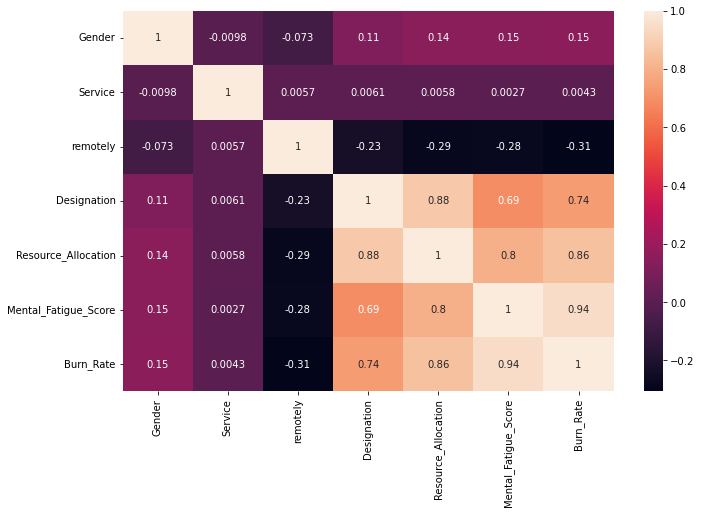

In [14]:
# # let's see correlation in two ways
plt.figure(figsize=(11,7))
corr = df.corr()
sns.heatmap(corr, annot=True)

interval columns not set, guessing: ['Gender', 'Service', 'remotely', 'Designation', 'Resource_Allocation', 'Mental_Fatigue_Score', 'Burn_Rate']


d:\anac\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable Employee ID is large: 22750. Are you sure this is not an interval variable? Analysis for pairs of variables including Employee ID can be slow.
  warnings.warn(


<AxesSubplot:>

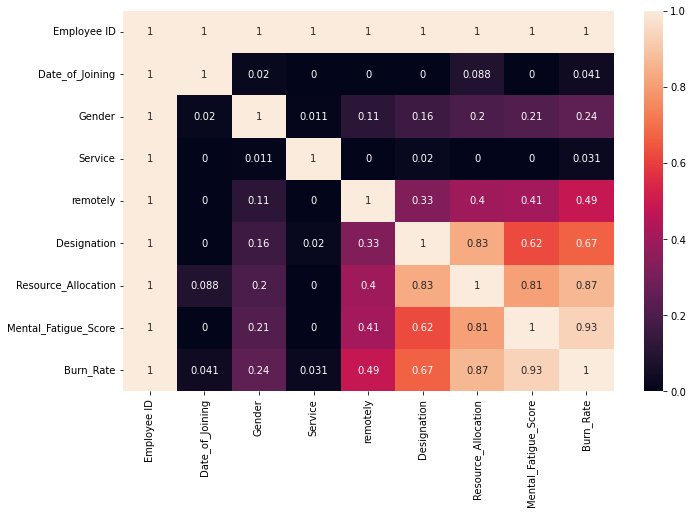

In [15]:
# The phik is suitable for calculating correlation in categorical variables and is sensitive to nonlinear dependencies
# for example, link between remote job and burn rate different in two ways
plt.figure(figsize=(11,7))
corr1 = df.phik_matrix()
sns.heatmap(corr1, annot=True)

# Missing values

In [16]:
df.isna().sum()

Employee ID                0
Date_of_Joining            0
Gender                     0
Service                    0
remotely                   0
Designation                0
Resource_Allocation     1381
Mental_Fatigue_Score    2117
Burn_Rate               1124
dtype: int64

In [17]:
df.isna().mean()

Employee ID             0.000000
Date_of_Joining         0.000000
Gender                  0.000000
Service                 0.000000
remotely                0.000000
Designation             0.000000
Resource_Allocation     0.060703
Mental_Fatigue_Score    0.093055
Burn_Rate               0.049407
dtype: float64

<AxesSubplot:>

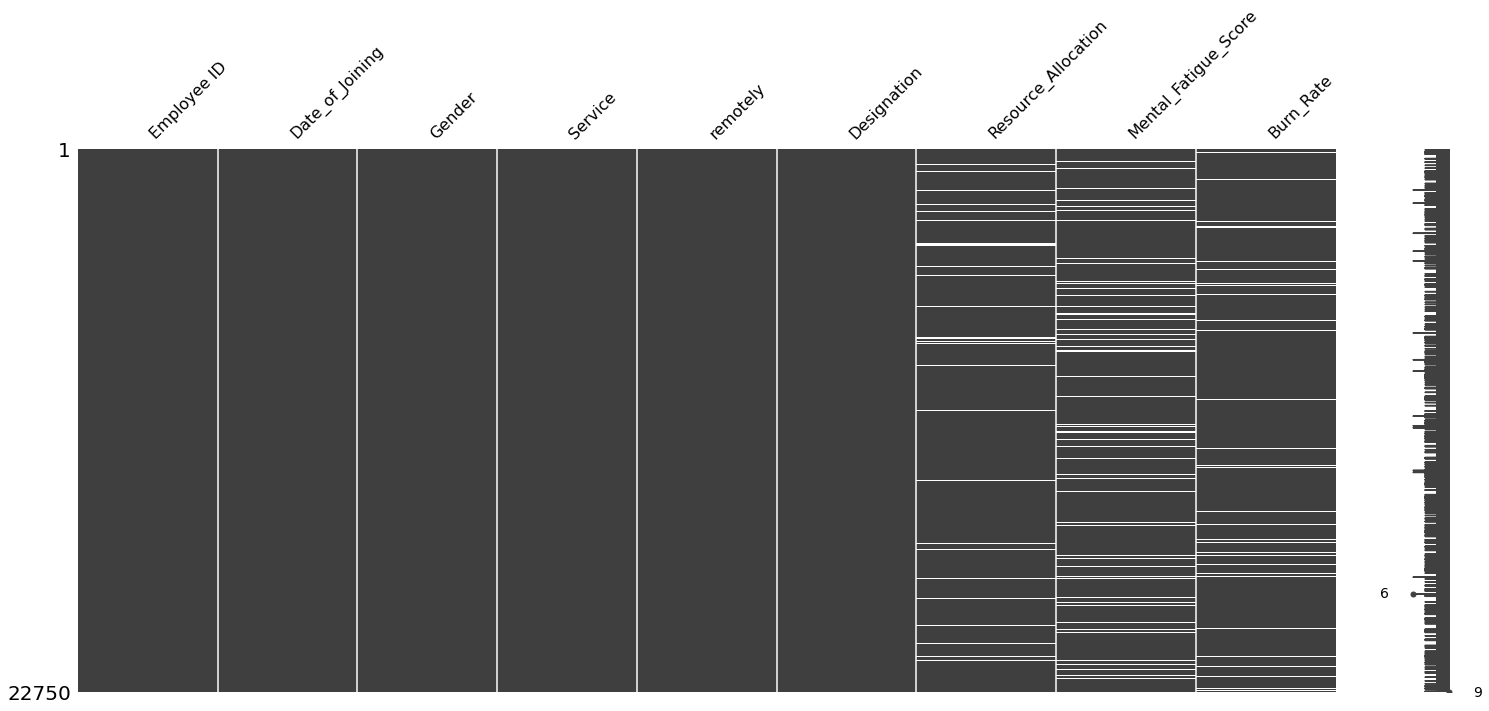

In [18]:
# we have some missing values for numerical values
msno.matrix(df)

In [19]:
# restoring data for the target variable may degrade the quality of the model
df.dropna(subset = 'Burn_Rate',axis = 0, inplace = True)

In [20]:
df

,Employee ID,Date_of_Joining,Gender,Service,remotely,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,2008-09-30,0,1,0,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,1,1,1,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,0,0,1,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,1,1,1,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,0,1,0,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,0,1,0,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,0,0,1,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,1,1,1,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,0,1,0,2.0,5.0,5.9,0.52


<AxesSubplot:>

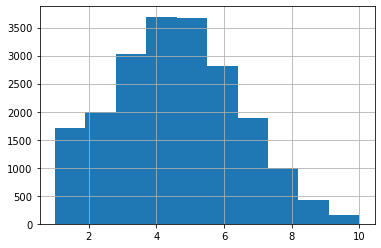

In [21]:
df['Resource_Allocation'].hist()

In [22]:
df['Resource_Allocation'].value_counts()

4.0     3694
5.0     3670
3.0     3028
6.0     2817
2.0     1988
7.0     1880
1.0     1701
8.0      992
9.0      428
10.0     150
Name: Resource_Allocation, dtype: int64

In [23]:
df['Designation'].value_counts()

2.0    7206
3.0    5698
1.0    4632
4.0    2275
0.0    1439
5.0     376
Name: Designation, dtype: int64

<AxesSubplot:xlabel='Resource_Allocation', ylabel='Designation'>

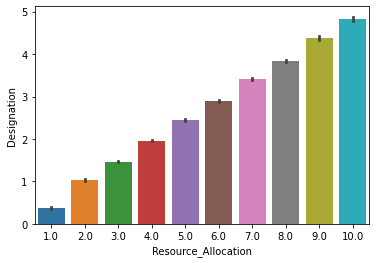

In [24]:
# we have correlation between Resource Allocation and Designation
sns.barplot(x = df['Resource_Allocation'], y = df['Designation'])

# Resource_Allocation impute

In [25]:
# let's fill in as the median value in the group
median_imputer_bins = df.copy()

In [26]:
Resourse_bins = median_imputer_bins.groupby('Designation')
Resourse_bins.Resource_Allocation.median()

Designation
0.0    1.0
1.0    3.0
2.0    4.0
3.0    6.0
4.0    7.0
5.0    9.0
Name: Resource_Allocation, dtype: float64

In [27]:
median_imputer_bins.Resource_Allocation = Resourse_bins.Resource_Allocation.apply(lambda x: x.fillna(x.median()))

In [28]:
median_imputer_bins.Resource_Allocation.isna().sum()

0

<AxesSubplot:xlabel='Resource_Allocation', ylabel='Designation'>

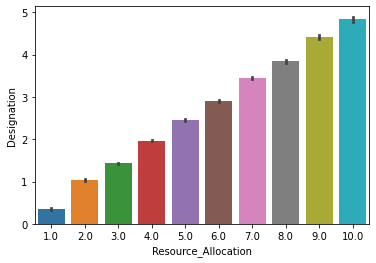

In [30]:
sns.barplot(x = median_imputer_bins['Resource_Allocation'], y = median_imputer_bins['Designation'])

In [31]:
df['Resource_Allocation'] = median_imputer_bins['Resource_Allocation']

<AxesSubplot:>

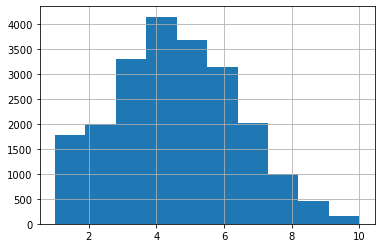

In [32]:
# the distribution is the same as before
df['Resource_Allocation'].hist()

# Mental_Fatigue_Score impute

<AxesSubplot:>

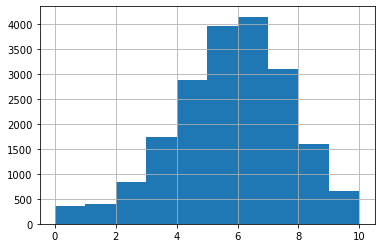

In [33]:
df['Mental_Fatigue_Score'].hist()

In [34]:
# most correlation between mental fatigue score and burn rate
# but burn rate is target. Next after burn rate is resource allocation
# let's fill missing values median in group by resource allocation
Mental_bins = median_imputer_bins.groupby('Resource_Allocation')
Mental_bins.Mental_Fatigue_Score.median()

Resource_Allocation
1.0     2.6
2.0     4.0
3.0     4.9
4.0     5.6
5.0     6.2
6.0     6.9
7.0     7.5
8.0     8.1
9.0     8.8
10.0    9.5
Name: Mental_Fatigue_Score, dtype: float64

In [35]:
median_imputer_bins.Mental_Fatigue_Score = Mental_bins.Mental_Fatigue_Score.apply(lambda x: x.fillna(x.median()))

In [36]:
median_imputer_bins.Resource_Allocation.isna().sum()

0

In [37]:
df['Mental_Fatigue_Score'] = median_imputer_bins['Mental_Fatigue_Score']

<AxesSubplot:>

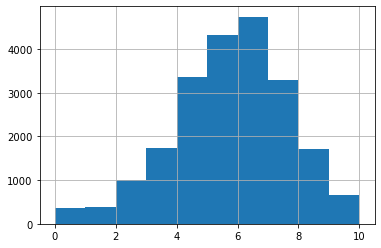

In [38]:
# the distribution is the same as before
df['Mental_Fatigue_Score'].hist()

In [39]:
# we haven't missing values
df.isna().mean()

Employee ID             0.0
Date_of_Joining         0.0
Gender                  0.0
Service                 0.0
remotely                0.0
Designation             0.0
Resource_Allocation     0.0
Mental_Fatigue_Score    0.0
Burn_Rate               0.0
dtype: float64

In [40]:
df.describe()

,Gender,Service,remotely,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
count,21626.000000,21626.000000,21626.000000,21626.000000,21626.000000,21626.000000,21626.000000
mean,0.475215,0.653103,0.540322,2.178766,4.484741,5.734052,0.452005
std,0.499397,0.475994,0.498383,1.135428,2.029670,1.888306,0.198226
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,4.600000,0.310000
50%,0.000000,1.000000,1.000000,2.000000,4.000000,5.900000,0.450000
75%,1.000000,1.000000,1.000000,3.000000,6.000000,7.000000,0.590000
max,1.000000,1.000000,1.000000,5.000000,10.000000,10.000000,1.000000


In [41]:
X = ['Date_of_Joining','Gender', 'Service', 'remotely', 'Designation','Resource_Allocation', 'Mental_Fatigue_Score']
cat_features = ['Date_of_Joining']
y = ['Burn_Rate']

In [42]:
# split data frame in train, test and validation 
train, test = train_test_split(df, train_size = 0.6, random_state = 42)
val, test = train_test_split(test, train_size = 0.5, random_state = 42)

In [43]:
from catboost import Pool

train_data = Pool(data = train[X],
                  label = train[y],
                  cat_features = cat_features
                 )

val_data = Pool(data = val[X],
                label = val[y],
                cat_features = cat_features
                 )

test_data = Pool(data = test[X],
                 label = test[y],
                 cat_features = cat_features
                 )

In [44]:
parameters = {'iterations': 1000,
              'cat_features': cat_features,
              'eval_metric': 'RMSE',
              'verbose': False,
              'random_seed': 42}

In [45]:
model = CatBoostRegressor(**parameters)

In [46]:
# for now we'll use grid only for learning rate
grid = {'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]}

In [47]:
result = model.grid_search(grid, train_data, verbose = False)


bestTest = 0.06018509721
bestIteration = 999


bestTest = 0.06002939237
bestIteration = 986


bestTest = 0.06011608832
bestIteration = 879


bestTest = 0.0600393044
bestIteration = 724


bestTest = 0.06008465202
bestIteration = 589


bestTest = 0.06007897485
bestIteration = 583


bestTest = 0.0601032074
bestIteration = 523


bestTest = 0.060005371
bestIteration = 337


bestTest = 0.06012713925
bestIteration = 373


bestTest = 0.06003820714
bestIteration = 409

Training on fold [0/3]

bestTest = 0.05948907628
bestIteration = 253

Training on fold [1/3]

bestTest = 0.0594644476
bestIteration = 195

Training on fold [2/3]

bestTest = 0.06015241607
bestIteration = 540



In [48]:
result['params']

{'learning_rate': 0.08}

In [49]:
parameters = {'iterations': 1000,
              'cat_features': cat_features,
              'eval_metric': 'RMSE',
              'verbose': 200,
              'random_seed': 42,
              'learning_rate': 0.08
             }

In [50]:
model.fit(train_data, eval_set = val_data)

In [51]:
model.predict(test[X])

array([0.37081436, 0.6299032 , 0.67062338, ..., 0.87379495, 0.4616554 ,
       0.32803454])

In [52]:
test['prediction'] = model.predict(test[X])

In [53]:
test

,Employee ID,Date_of_Joining,Gender,Service,remotely,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate,prediction
7257,fffe33003000370031003300,2008-01-06,1,1,1,2.0,5.0,4.8,0.41,0.370814
6566,fffe31003100350030003100,2008-01-01,1,1,0,4.0,7.0,7.2,0.50,0.629903
13190,fffe3700320034003900,2008-10-17,0,1,0,2.0,7.0,7.5,0.70,0.670623
18423,fffe3200320032003800,2008-11-23,0,1,1,3.0,5.0,6.8,0.47,0.517307
12990,fffe3900360038003500,2008-11-18,1,0,0,2.0,5.0,4.8,0.42,0.384361
...,...,...,...,...,...,...,...,...,...,...
18201,fffe3200300030003800,2008-07-04,0,0,1,2.0,4.0,4.6,0.41,0.324489
7402,fffe3100320034003900,2008-11-05,1,1,0,2.0,4.0,6.4,0.60,0.501461
4395,fffe32003800360036003500,2008-01-05,1,0,0,3.0,7.0,9.8,0.85,0.873795
12639,fffe32003600370033003600,2008-07-08,0,0,1,2.0,5.0,5.9,0.54,0.461655


In [54]:
# burnout is most affected by mental fatigue
# not suprised
model.get_feature_importance(prettified = True)

,Feature Id,Importances
0,Mental_Fatigue_Score,79.534965
1,Resource_Allocation,13.591335
2,Designation,3.787351
3,Date_of_Joining,1.410642
4,remotely,1.165840
5,Gender,0.334213
6,Service,0.175653


In [55]:
def error(y_true,y_pred):
    print('MAE:', mean_absolute_error(y_true,y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_true,y_pred))
    print('MSE:', mean_squared_error(y_true,y_pred, squared=False))
    print('RMSE:', mean_squared_error(y_true,y_pred, squared=True))
    print('R2:', r2_score(y_true,y_pred))

In [56]:
# more than 90% of R2 is not bad
error(test['Burn_Rate'], test['prediction'])

MAE: 0.04587970380133922
MAPE: 1832879882941.9866
MSE: 0.05767430194686822
RMSE: 0.003326325105058527
R2: 0.9107055816894423
